In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import logistic regression and random forest classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [66]:
#load in cleaned data
df = pd.read_csv('cleaned_train_EGN5442_v2.csv')
df.head()

,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29
0,1,54359.0,0,50,5,5,5,4,3,5.0,...,5,3,4,3,21,12.0,0,0,1,192.0
1,1,84649.0,0,44,1,1,1,1,3,3.0,...,4,4,4,2,0,0.0,1,0,1,1034.0
2,0,59015.0,0,72,3,1,5,5,3,2.0,...,3,1,3,2,0,8.0,1,0,3,1452.0
3,0,99990.0,0,38,1,3,1,3,5,1.0,...,4,1,4,5,0,0.0,1,1,3,916.0
4,1,83569.0,1,37,5,5,5,5,2,5.0,...,4,4,4,5,0,0.0,1,0,1,390.0


In [67]:
#Normalize continuous data columns in dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_cols = ['x2','x5','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x28', 'x29']
binary_cols = ['x3','x25','x26']
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
df[binary_cols] = df[binary_cols].astype(int)
df.head()


,y,x2,x3,x5,x9,x10,x11,x12,x13,x14,...,x19,x20,x21,x22,x23,x24,x25,x26,x28,x29
0,1,0.080238,0,0.697439,1.717265,1.275810,1.617288,0.797343,-0.153851,1.322004,...,1.160598,-0.238736,0.307699,-0.221356,0.158630,-0.085262,0,0,-1.001504,-1.009497
1,1,1.089867,0,0.301363,-1.362649,-1.374885,-1.350566,-1.547782,-0.153851,-0.255864,...,0.313043,0.551602,0.307699,-0.983896,-0.386589,-0.392066,1,0,-1.001504,-0.167606
2,0,0.235432,0,2.149720,0.177308,-1.374885,1.617288,1.579051,-0.153851,-1.044798,...,-0.534511,-1.819412,-0.543032,-0.983896,-0.386589,-0.187530,1,0,1.075331,0.250340
3,0,1.601215,0,-0.094713,-1.362649,-0.049538,-1.350566,0.015635,1.350962,-1.833732,...,0.313043,-1.819412,0.307699,1.303724,-0.386589,-0.392066,1,1,1.075331,-0.285591
4,1,1.053869,1,-0.160726,1.717265,1.275810,1.617288,1.579051,-0.906258,1.322004,...,0.313043,0.551602,0.307699,1.303724,-0.386589,-0.392066,1,0,-1.001504,-0.811522


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101947 entries, 0 to 101946
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       101947 non-null  int64  
 1   x2      101947 non-null  float64
 2   x3      101947 non-null  int64  
 3   x5      101947 non-null  float64
 4   x9      101947 non-null  float64
 5   x10     101947 non-null  float64
 6   x11     101947 non-null  float64
 7   x12     101947 non-null  float64
 8   x13     101947 non-null  float64
 9   x14     101947 non-null  float64
 10  x15     101947 non-null  float64
 11  x16     101947 non-null  float64
 12  x17     101947 non-null  float64
 13  x18     101947 non-null  float64
 14  x19     101947 non-null  float64
 15  x20     101947 non-null  float64
 16  x21     101947 non-null  float64
 17  x22     101947 non-null  float64
 18  x23     101947 non-null  float64
 19  x24     101947 non-null  float64
 20  x25     101947 non-null  int64  
 21  x26     10

Logistic Regression

In [69]:
#apply a logistic regression model to data
#split data into X and y
X = df.drop('y', axis=1)
y = df['y']
#split into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [70]:
# apply logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [71]:
#Hyperparameter tuning for logistic regression using grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
logreg = grid.best_estimator_

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


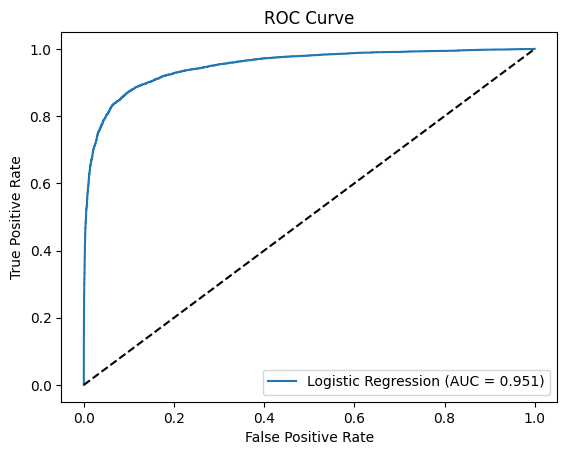

In [72]:
#apply tuned logistic regression model
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#evaluate tuned model
from sklearn.metrics import roc_auc_score, roc_curve
y_prob = logreg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [73]:
#evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#show auc score for test and train sets
y_prob_train = logreg.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_prob_train)
print(f'Train AUC: {auc_train:.3f}, Test AUC: {auc:.3f}')

Logistic Regression Accuracy: 0.8889161353604709
Confusion Matrix:
 [[10558  1031]
 [ 1234  7567]]
Train AUC: 0.950, Test AUC: 0.951


The accuracy here is actually less than that before hyperparameter tuning. I am not totally certain as to why. 

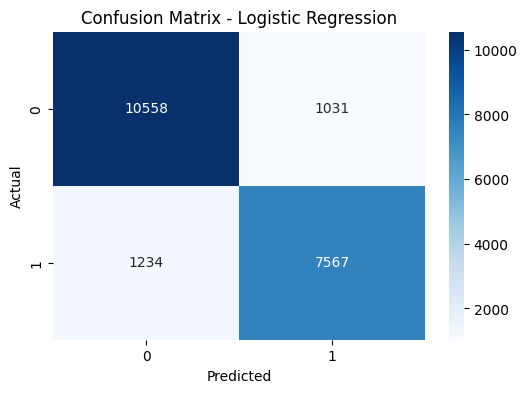

In [74]:

# show confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


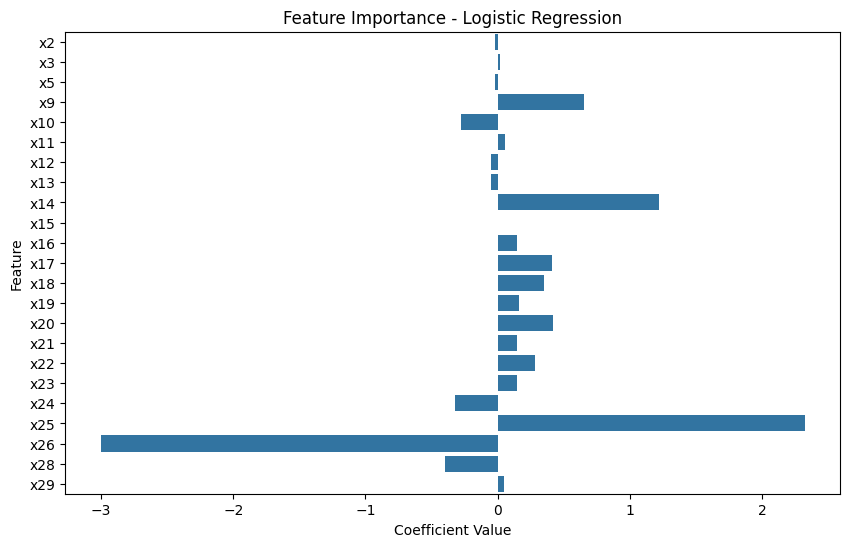

In [75]:
# plot the feature importance using seaborn
feature_importance = pd.Series(logreg.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Random Forest Classifier

In [76]:
#Apply Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=12)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#evaluate model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.9589014222658165
Confusion Matrix:
 [[11338   251]
 [  587  8214]]


In [77]:
#hyperparameter tuning for random forest using grid search
param_grid_rf = {'n_estimators': [25, 50, 150], 'max_depth': [10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=12), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
rf = grid_rf.best_estimator_

Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 150}


In [78]:
#apply tuned random forest model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#evaluate tuned model
print("Tuned Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Tuned Random Forest Classifier Accuracy: 0.9586071603727317
Confusion Matrix:
 [[11328   261]
 [  583  8218]]


This is also worse than the original case, likely because the defaults may work very well for this and I am not well versed on how to choose a parameter space to explore. 

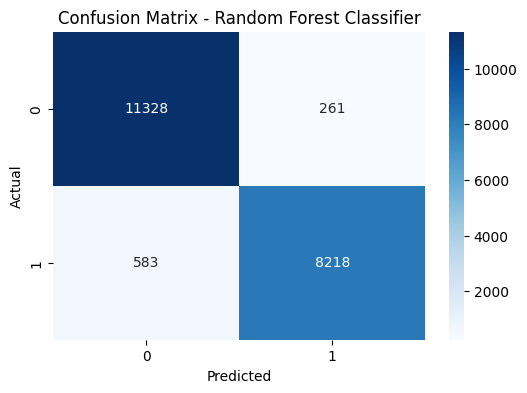

In [79]:
#Show confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Train AUC: 1.000
Random Forest Test AUC: 0.993


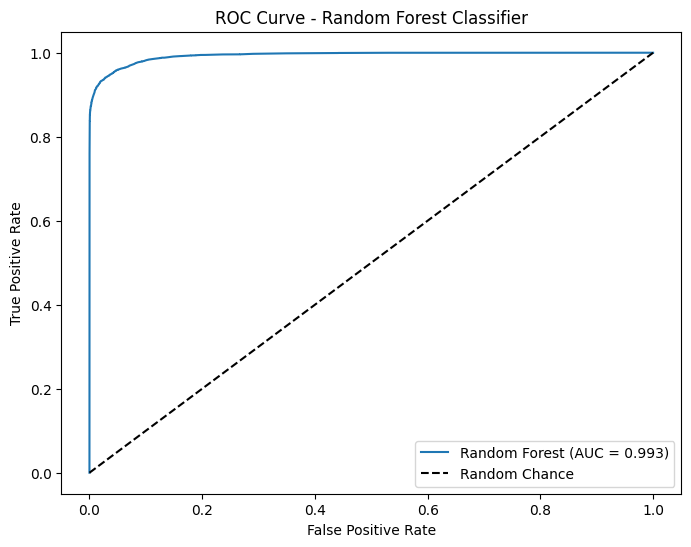

In [80]:
#show ROC curve and AUC for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend()

#print both AUC for test and train sets
y_train_prob_rf = rf.predict_proba(X_train)[:, 1]
train_auc_rf = roc_auc_score(y_train, y_train_prob_rf)
print(f"Random Forest Train AUC: {train_auc_rf:.3f}")
print(f"Random Forest Test AUC: {auc_rf:.3f}")


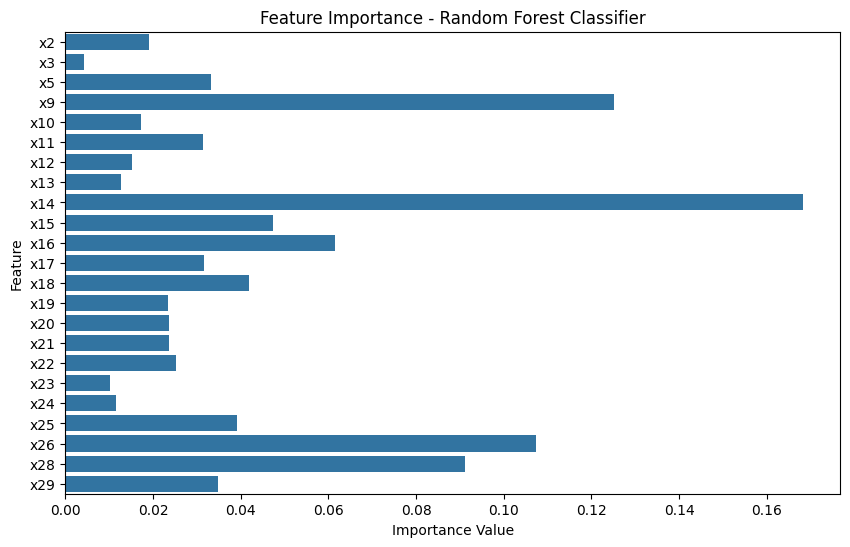

In [81]:
#plot with feature importance for Random Forest
feature_importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf.values, y=feature_importance_rf.index)
plt.title('Feature Importance - Random Forest Classifier')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

Comparing both

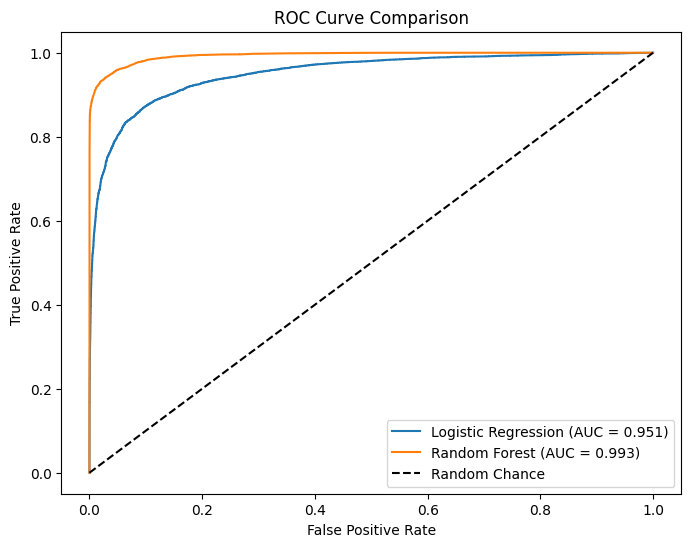

In [82]:
#compare both ROC curves and confusion matrices
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

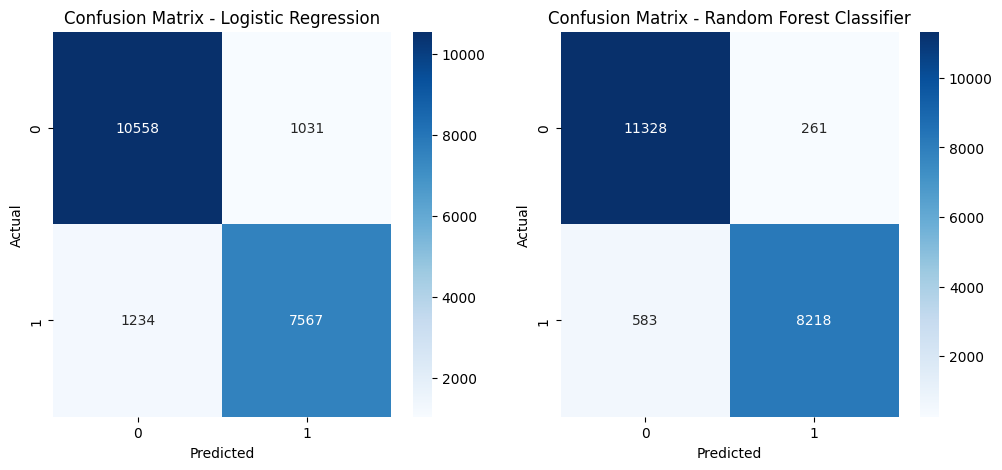

In [83]:
# compare confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest Classifier')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.show()

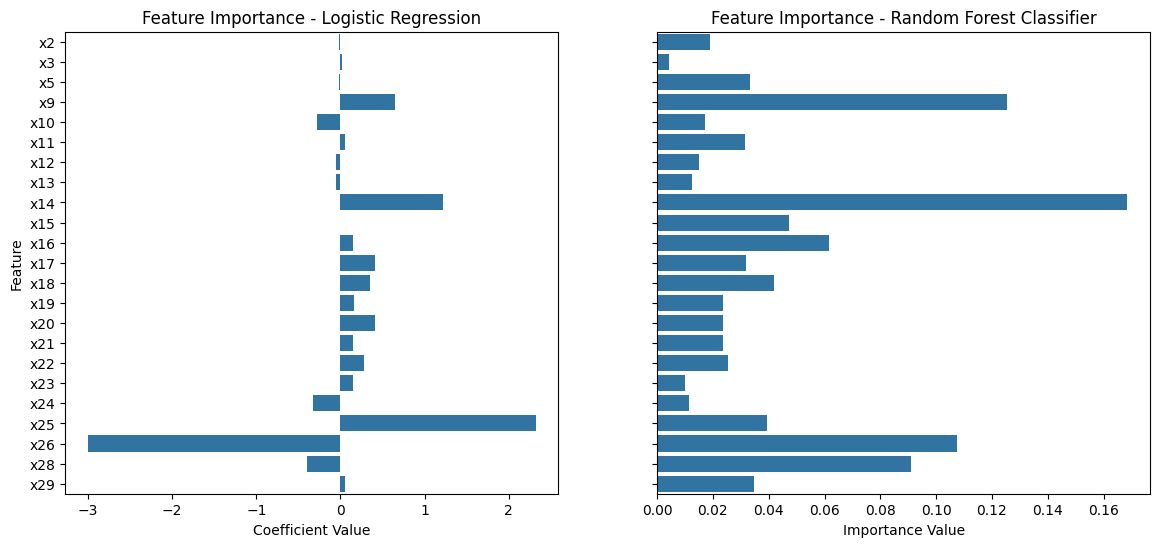

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(x=feature_importance.values, y=feature_importance.index, ax=axes[0])
axes[0].set_title('Feature Importance - Logistic Regression')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Feature')
sns.barplot(x=feature_importance_rf.values, y=feature_importance_rf.index, ax=axes[1])
axes[1].set_title('Feature Importance - Random Forest Classifier')
axes[1].set_xlabel('Importance Value')
axes[1].set_ylabel('Feature')
plt.show()
